# Springboard Data Storytelling Project

<img src="USA7s_champs.JPG" alt="USA7s"/>  
## Analysis of USA 7s Team Performance, 2017-18

For this project, I will be analyzing the USA 7s team performance in the 2017-18 [HSBC World Rugby Sevens Series](https://www.world.rugby/sevens-series) ("World Series"). The World Series is a tournament consisting of 10 tournaments around the globe. Each team plays 5-6 matches in a tournament, and points are awarded based on a team's finishing place. The top-placed team in each tournament is the winner of the Cup Final, and the team with the total cumulative points from all ten tournaments is crowned the overall [Series champion](https://www.world.rugby/sevens-series/series-info).

In the Capstone 1 project, a Random Forest model was built from the USA's matches on the World Series from the 2015-16 season through the 2017-18 season. The Random Forest model provides a ["feature importance"](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_) attribute, which returns an array of each feature’s importance in the model. I'll be looking at the top five most important features in the model, and looking at their relationship to the USA's performance in these areas during the most recent full season (2017-18).

I'll also look at how these important features hold up in the the first two tournaments of the 2018-19 World Series. I will analysze how the USA performed in the match statistics/features deemed important by the model, and how that performance translated into wins and losses.

Ultimately, I will be analyzing whether the features produced by the "feature importance" attribute can be used as a strong predictor of match outcomes on a macro level - across the 2017-18 Series, and on a micro level - in individual matches.

## USA 7s 2017-18 World Series Overall Results
    
In the 2017-18 World Series, the USA finished the Series in 6th place - their best finish ever, winning one tournament in the Series in Las Vegas. Overall, the USA had a record of 33-22-4 in the 2017-18 season.

**Scoring**

In their 33 wins, the USA had a mean score of 29.24 points for and 10.70 points against, and 4.58 tries for and 1.73 against.

In the USA's 22 losses, the USA had a mean score of 11.86 points for and 25.68 points against, and 1.86 tries for and 4.05 against.

In [99]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Show plots inline
%matplotlib inline

# set option to NOT truncate columns in DF display
pd.set_option('display.max_columns', None)
# disable copy/slice dataframe warning
pd.options.mode.chained_assignment = None  # default='warn'

## 2017-18 World Series Data Set
First, I will be analyzing the USA 7s matches for the 2017-2018 World Series.  The 2017-18 World Series data was cleaned and processed during the work for the Capstone 1 project. The dataframe contains the match statistics for the USA and for their opponents.

In [52]:
df = pd.read_csv('data/all_USA_2017-18_matches_result.csv')
df.head()

,Team,Opposition,MatchID,Date,Tournament,TotalPoints,Scores,Conversions,Total PointsConceded,Tries,Total Tries Conceded,Try Scoring Rate(1 every x secs),Try Conceding Rate(1 every x secs),Tries Scored Build-Up(No Ruck/Maul),Tries Conceded Build-Up(No Ruck/Maul),Opp22m Entries,Opp22m Entry Rate (1 every x secs),Own22m Entries,Own22m Entry Rate(1 every x secs),Tries Scored per Opp22m Entry,Tries Conceded per Own22m Entry,Possession Time,Possession Time(Opp),Passes,Passing Rate(1 every x secs),Rucks Attack,Rucking Rate Attack (secs),Defensive Rucks,% Ruck Success Own,Own Rucks Won per Match,% Ruck Success Opp,Opp Rucks Won per Match,Turnovers Won,Turnovers Conceded,Turnover Differential,Own Contestable Restarts,Own Contestable Restarts Regained,Contestable_Restart_Win_Pct,Opp Contestable Restarts,Opp Contestable Restarts Received,Total Scrums Own Feed,Scrum Success Own Feed,Scrum_Win_Pct,Total Lineouts Own Throw,Lineout Success Own Throw,Lineout_Win_Pct,Penalty/FK Conceded,Ruck-Maul Penalties Conceded,Yellow_Red Cards,Result
0,Argentina,USA,2,12/2/17,2017-18_Dubai_7s,36,22,0.25,14,4,2,43,86,1,0,6,28.5,2,85.5,0.666666667,1,171,172,22,7.8,9,19.0,10,1.000000,9,0.100000,1,2,1,1,1,0,0.000000,3,2,2,2,1.0,4,4,1.0,1,1,0,1
1,Canada,USA,14,12/2/17,2017-18_Dubai_7s,15,10,0.00,5,2,1,204,220,0,0,7,58.4,2,204.2,0.285714286,0.5,408,220,72,5.7,32,12.8,12,0.937500,30,0.083333,1,8,3,5,2,1,50.000000,2,1,3,3,1.0,2,2,1.0,2,2,0,1
2,New Zealand,USA,39,12/2/17,2017-18_Dubai_7s,34,22,0.25,12,4,2,49,104,3,1,4,48.9,3,65.1,1,0.666666667,195,207,33,5.9,7,27.9,11,0.857143,6,0.090909,1,6,3,3,3,1,33.333333,3,1,0,0,0.0,1,0,0.0,4,2,0,1
3,Samoa,USA,45,12/2/17,2017-18_Dubai_7s,40,26,0.75,14,4,2,57,75,1,0,6,37.9,5,45.5,0.666666667,0.4,227,149,39,5.8,8,28.4,8,1.000000,8,0.250000,2,4,1,3,4,1,25.000000,3,2,1,1,1.0,2,2,1.0,0,0,0,1
4,USA,Argentina,2,12/2/17,2017-18_Dubai_7s,36,14,1.00,22,2,4,86,43,0,1,2,86.1,6,28.7,1,0.666666667,172,171,28,6.1,10,17.2,9,0.900000,9,0.000000,0,1,2,-1,3,1,33.333333,1,1,0,0,0.0,0,0,0.0,3,3,0,0


In [6]:
# Clean up and wrangle data a bit more, including subsetting the data for USA matches.
# Strip underscores from tournament name for better looking labels
df['Tournament'] = df['Tournament'].str.replace("_"," ")
#df.head()

In [53]:
# df of only USA matches
usa = df[(df['Team'] == 'USA')]

## 2017-18 Series Descriptive Statistics for USA's Matches

In [9]:
#Examine the descriptive statistics for only USA matches
usa.describe()

,MatchID,TotalPoints,Scores,Conversions,Total PointsConceded,Tries,Total Tries Conceded,Try Scoring Rate(1 every x secs),Try Conceding Rate(1 every x secs),Tries Scored Build-Up(No Ruck/Maul),Tries Conceded Build-Up(No Ruck/Maul),Opp22m Entries,Opp22m Entry Rate (1 every x secs),Own22m Entries,Own22m Entry Rate(1 every x secs),Possession Time,Possession Time(Opp),Passes,Passing Rate(1 every x secs),Rucks Attack,Rucking Rate Attack (secs),Defensive Rucks,% Ruck Success Own,Own Rucks Won per Match,% Ruck Success Opp,Opp Rucks Won per Match,Turnovers Won,Turnovers Conceded,Turnover Differential,Own Contestable Restarts,Own Contestable Restarts Regained,Contestable_Restart_Win_Pct,Opp Contestable Restarts,Opp Contestable Restarts Received,Total Scrums Own Feed,Scrum Success Own Feed,Scrum_Win_Pct,Total Lineouts Own Throw,Lineout Success Own Throw,Lineout_Win_Pct,Penalty/FK Conceded,Ruck-Maul Penalties Conceded,Yellow_Red Cards,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,30.000000,39.152542,22.186441,0.686239,16.966102,3.474576,2.694915,85.491525,71.152542,1.525424,1.423729,4.898305,55.881356,3.932203,81.423729,229.084746,182.440678,37.203390,6.545763,10.355932,25.377966,8.508475,0.878939,9.135593,0.169489,1.389831,3.779661,4.406780,-0.627119,3.372881,1.576271,44.188862,2.576271,1.864407,1.016949,1.000000,0.621469,1.898305,1.711864,0.836158,2.576271,1.491525,0.101695,0.694915
std,17.175564,8.940056,10.331530,0.293777,9.316219,1.579567,1.441434,56.175333,43.564385,1.291296,1.220562,1.854119,39.204673,1.901582,69.024449,46.025963,47.753776,11.505291,1.777961,3.735952,12.370670,4.617705,0.117286,3.486217,0.134188,1.144958,1.781783,2.305306,2.671034,1.530138,1.147762,29.540792,1.588790,1.209982,0.991194,0.964901,0.485252,1.077912,1.083590,0.327889,1.763650,1.356630,0.304841,0.594638
min,1.000000,15.000000,5.000000,0.000000,0.000000,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,22.500000,0.000000,0.000000,137.000000,92.000000,12.000000,3.800000,2.000000,13.900000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,1.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.500000,34.000000,14.000000,0.500000,12.000000,2.000000,2.000000,51.000000,46.000000,1.000000,1.000000,4.000000,38.350000,2.000000,36.100000,197.000000,155.000000,28.500000,5.450000,8.000000,18.750000,6.000000,0.806250,7.000000,0.029412,0.500000,3.000000,2.000000,-3.000000,2.000000,1.000000,33.333333,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,30.000000,40.000000,22.000000,0.714286,14.000000,4.000000,2.000000,71.000000,65.000000,1.000000,1.000000,5.000000,46.500000,4.000000,56.300000,224.000000,176.000000,37.000000,6.200000,10.000000,21.700000,8.000000,0.900000,9.000000,0.153846,1.000000,4.000000,5.000000,-1.000000,3.000000,2.000000,50.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000
75%,44.500000,45.000000,28.000000,1.000000,24.000000,4.500000,4.000000,92.500000,87.500000,2.000000,2.000000,6.000000,65.150000,6.000000,100.650000,265.000000,210.500000,43.500000,7.200000,13.000000,26.550000,10.000000,1.000000,11.000000,0.267857,2.000000,5.000000,6.000000,1.000000,4.000000,2.000000,66.666667,4.000000,3.000000,2.000000,2.000000,1.000000,2.500000,2.000000,1.000000,4.000000,2.000000,0.000000,1.000000
max,59.000000,59.000000,47.000000,1.000000,35.000000,7.000000,5.000000,312.000000,225.000000,5.000000,5.000000,10.000000

## Feature Importance
In the modelling of the [Random Forest model](https://github.com/chudzikr/Springboard_Capstone1/blob/master/code/Model_Eval_RF.ipynb) that was built from the USA's match data from 2015 - 2018, the Feature Importance ('feature_importances_') was extracted from the model.

Let's look at the top five important features and see how the USA performed in these areas of the game during the 2017-18 World Series.


| Feature | Importance |
| --- | --- |
|Poss_Time_Diff | 0.259110 |
|PenFK_Against_Diff | 0.170337 |
|Contestable_KO_Win_pct_Diff  |  0.140098  |
|Passes_Diff | 0.126238  |
|Ruck_Win_pct_Diff | 0.115913 |

In [76]:
#Select subset of the most important features from RF model from USA matches
#Poss_Time_Diff, PenFK_Against_Diff, Contestable_KO_Win_pct_Diff, Passes_Diff, Ruck_Win_pct_Diff 
impt_feat = usa[['MatchID','Opposition','Tournament', 'Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded', 
                '% Ruck Success Own', 'Result']]
#impt_feat.head(25)

In [83]:
#Subset USA Wins
usa_w = df[(df['Team'] == 'USA') & (df['Result'] == 1)]
#Subset USA Losses
usa_l = df[(df['Team'] == 'USA') & (df['Result'] == 0)]
#Subset USA Ties (not required)
#usa_t = df[(df['Team'] == 'USA') & (df['Result'] == 2)]

In [78]:
#print("2017-18 Scoring Differentials between USA Wins and Losses \n")

#Differences in Mean scores, Tries for Win/Loss
points_diff = usa_w['Scores'].mean() - usa_l['Scores'].mean()
#print("Difference in mean Points Scored: " + str(round(points_diff, 2)))

points_concede_diff = usa_w['Total PointsConceded'].mean() - usa_l['Total PointsConceded'].mean()
#print("Difference in mean Points Conceded: " + str(round(points_concede_diff, 2)))

try_diff = usa_w['Tries'].mean() - usa_l['Tries'].mean()
#print("Difference in mean Tries Scored: " + str(round(try_diff, 2)))

try_concede_diff = usa_w['Total Tries Conceded'].mean() - usa_l['Total Tries Conceded'].mean()
#print("Difference in mean Tries Conceded: " + str(round(try_concede_diff, 2)))

## 2017-18 Scoring Differentials between USA Wins and Losses 

> Difference in mean Points Scored: 17.38 

> Difference in mean Points Conceded: -14.98 

> Difference in mean Tries Scored: 2.71 

> Difference in mean Tries Conceded: -2.32

## 2017-18 Season Trends
Let's take a look at the high, low, and anomalies for the USA's important features in the 2017-18 season, including mean scoring differentials in wins vs. losses.

In [79]:
# Imprt features: ['Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded','% Ruck Success Own']
restart_min = usa['Contestable_Restart_Win_Pct'].min()
restart_max = usa['Contestable_Restart_Win_Pct'].max()
poss_min = usa['Possession Time'].min()
poss_max = usa['Possession Time'].max()
pass_min = usa['Passes'].min()
pass_max = usa['Passes'].max()
pen_min = usa['Penalty/FK Conceded'].min()
pen_max = usa['Penalty/FK Conceded'].max()
ownruck_min = usa['% Ruck Success Own'].min()
ownruck_max = usa['% Ruck Success Own'].max()

#print("Min Restart Win %:",restart_min)
#print("Max Restart Win %:",restart_max,'\n')
#print("Min Possession Time:",poss_min,"sec")
#print("Max Possession Time:",poss_max,"sec\n")
#print("Min Passes:",pass_min)
#print("Max Passes:",pass_max, '\n')
#print("Min Penalty/Free Kick:",pen_min)
#print("Max Penalty/Free Kick:",pen_max, '\n')
#print("Min Own Ruck Win %:",ownruck_min)
#print("Max Own Ruck Win %:",ownruck_max)

### Maximum and Minimum for Each Important Feature

> Min Restart Win %: 0.0  
> Max Restart Win %: 100.0 

> Min Possession Time: 137 sec  
> Max Possession Time: 325 sec

> Min Passes: 12  
> Max Passes: 69 

> Min Penalty/Free Kick: 0  
> Max Penalty/Free Kick: 6 

> Min Own Ruck Win %: 0.5  
> Max Own Ruck Win %: 1.0

## 2017-18 Trends Across the Season
Look at the performance trends across the 2017-18 season, by match and tournament.

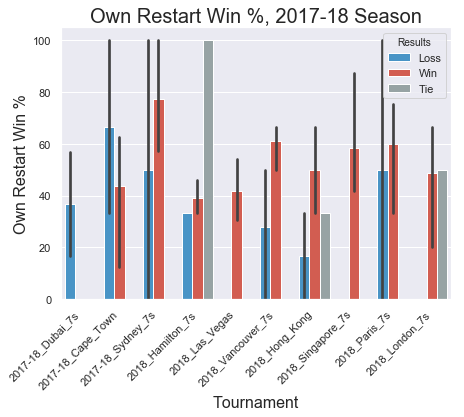

In [118]:
# Create a barplot of Contestable_Restart_Win_Pct across the season
# Fix Legend labels
def transconum(res):
    if (res == 0):
        return "Loss"
    elif (res == 1):
        return "Win"
    else:
        return "Tie"

impt_feat['Results'] = impt_feat['Result'].apply(transconum)

sns.set(style="whitegrid")
# set figure size
sns.set(rc={'figure.figsize':(7,5)})
# set color palette 
flatui = ["#3498db", "#e74c3c", "#95a5a6"]
sns.set_palette(flatui)

#legend = ['Win', 'Loss', 'Tie']
# rotate and right align tournament labels
plt.xticks(rotation=45, ha='right')
# set plot and plot parameters
ax = sns.barplot(x='Tournament', y='Contestable_Restart_Win_Pct', hue='Results', data=impt_feat)
ax.axes.set_title("Own Restart Win %, 2017-18 Season",fontsize=20)
ax.set_xlabel('Tournament',fontsize=16)
ax.set_ylabel('Own Restart Win %',fontsize=16)
#ax.legend(legend)



plt.show()

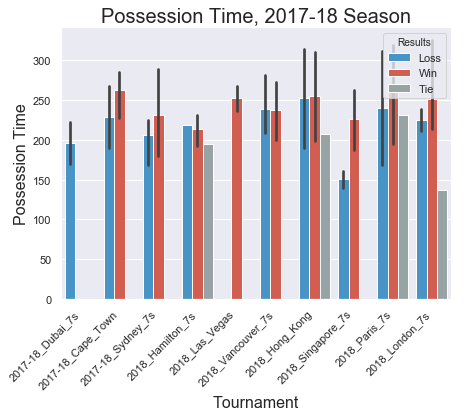

In [119]:
# Create a barplot of Possession Time across the season
# Fix Legend labels
def transconum(res):
    if (res == 0):
        return "Loss"
    elif (res == 1):
        return "Win"
    else:
        return "Tie"

impt_feat['Results'] = impt_feat['Result'].apply(transconum)

sns.set(style="whitegrid")
# set figure size
sns.set(rc={'figure.figsize':(7,5)})
# set color palette 
flatui = ["#3498db", "#e74c3c", "#95a5a6"]
sns.set_palette(flatui)


legend = ['Win', 'Loss', 'Tie']
plt.legend(legend)

# rotate and right align tournament labels
plt.xticks(rotation=45, ha='right')
# set plot and plot parameters
ax = sns.barplot(x='Tournament', y='Possession Time', hue='Results', data=impt_feat) 
ax.axes.set_title("Possession Time, 2017-18 Season",fontsize=20)
ax.set_xlabel('Tournament',fontsize=16)
ax.set_ylabel('Possession Time',fontsize=16)
#ax.tick_params(labelsize=5)

plt.show()

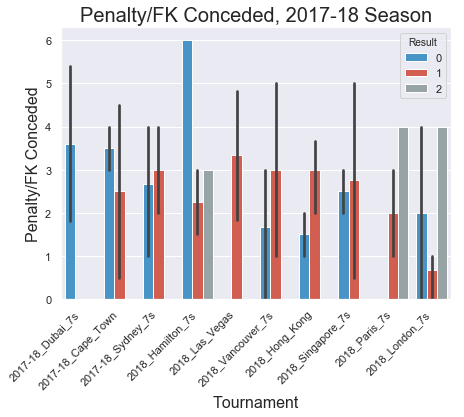

In [87]:
# Create a barplot of Penalty/FK Conceded across the season
# Fix Legend labels
def transconum(res):
    if (res == 0):
        return "Loss"
    elif (res == 1):
        return "Win"
    else:
        return "Tie"

impt_feat['Results'] = impt_feat['Result'].apply(transconum)

sns.set(style="whitegrid")
# set figure size
sns.set(rc={'figure.figsize':(7,5)})
# set color palette 
flatui = ["#3498db", "#e74c3c", "#95a5a6"]
sns.set_palette(flatui)


legend = ['Win', 'Loss', 'Tie']
plt.legend(legend)

# rotate and right align tournament labels
plt.xticks(rotation=45, ha='right')

# set plot and plot parameters
ax = sns.barplot(x='Tournament', y='Penalty/FK Conceded', hue='Results', data=impt_feat)
ax.axes.set_title("Penalty/FK Conceded, 2017-18 Season",fontsize=20)
ax.set_xlabel('Tournament',fontsize=16)
ax.set_ylabel('Penalty/FK Conceded',fontsize=16)
#ax.tick_params(labelsize=5)

plt.show()

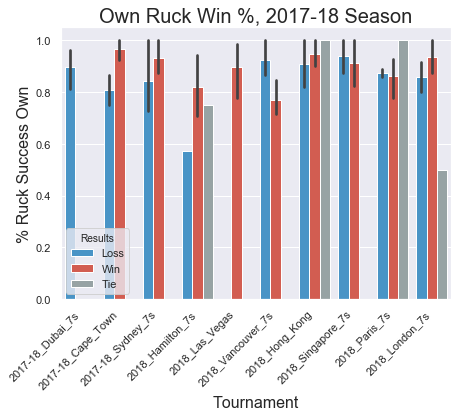

In [120]:
# Create a barplot of '% Ruck Success Own' across the season
# Fix Legend labels
def transconum(res):
    if (res == 0):
        return "Loss"
    elif (res == 1):
        return "Win"
    else:
        return "Tie"

impt_feat['Results'] = impt_feat['Result'].apply(transconum)

sns.set(style="whitegrid")
# set figure size
sns.set(rc={'figure.figsize':(7,5)})
# set color palette 
flatui = ["#3498db", "#e74c3c", "#95a5a6"]
sns.set_palette(flatui)

legend = ['Win', 'Loss', 'Tie']
plt.legend(legend)

# rotate and right align tournament labels
plt.xticks(rotation=45, ha='right')
# set plot and plot parameters
ax = sns.barplot(x='Tournament', y='% Ruck Success Own', hue='Results', data=impt_feat) 
ax.axes.set_title("Own Ruck Win %, 2017-18 Season",fontsize=20)
ax.set_xlabel('Tournament',fontsize=16)
ax.set_ylabel('% Ruck Success Own',fontsize=16)
#ax.tick_params(labelsize=5)

plt.show()

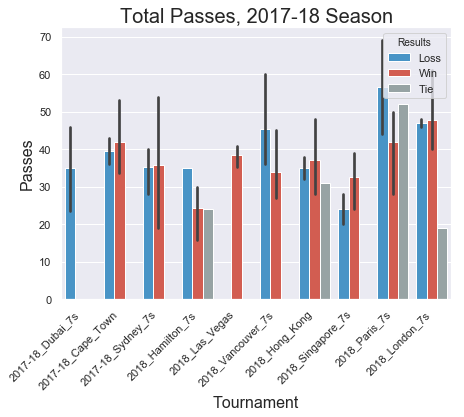

In [121]:
# Create a barplot of 'Passes' across the season
# Fix Legend labels
def transconum(res):
    if (res == 0):
        return "Loss"
    elif (res == 1):
        return "Win"
    else:
        return "Tie"

impt_feat['Results'] = impt_feat['Result'].apply(transconum)

sns.set(style="whitegrid")
# set figure size
sns.set(rc={'figure.figsize':(7,5)})
# set color palette 
flatui = ["#3498db", "#e74c3c", "#95a5a6"]
sns.set_palette(flatui)

legend = ['Win', 'Loss', 'Tie']
plt.legend(legend)

# rotate and right align tournament labels
plt.xticks(rotation=45, ha='right')
# set plot and plot parameters
ax = sns.barplot(x='Tournament', y='Passes', hue='Results', data=impt_feat) #
ax.axes.set_title("Total Passes, 2017-18 Season",fontsize=20)
ax.set_xlabel('Tournament',fontsize=16)
ax.set_ylabel('Passes',fontsize=16)
#ax.tick_params(labelsize=5)

plt.show()

## Anomaly Detection
Let's also take a look at anomalies among the important features, using the outliers in boxplots to identify the anomalies.

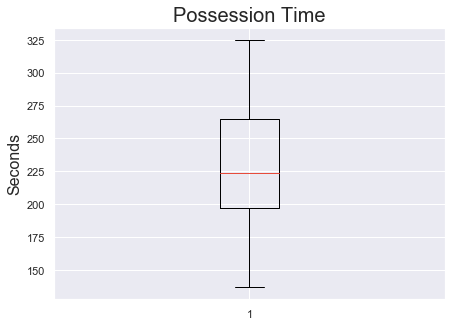

In [67]:
# 'Possession Time'
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Possession Time',fontsize=20)
ax3.set_ylabel('Seconds',fontsize=16)
ax3.boxplot(usa['Possession Time'], flierprops=green_diamond)
plt.show()

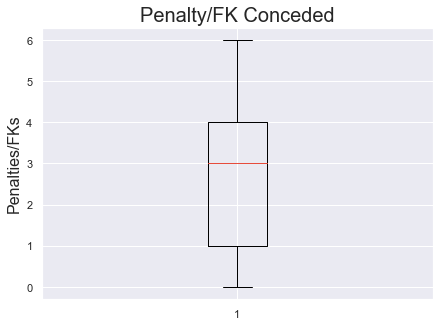

In [59]:
# 'Penalty/FK Conceded'
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Penalty/FK Conceded', fontsize=20)
ax3.set_ylabel('Penalties/FKs',fontsize=16)
ax3.boxplot(usa['Penalty/FK Conceded'], flierprops=green_diamond)
plt.show()

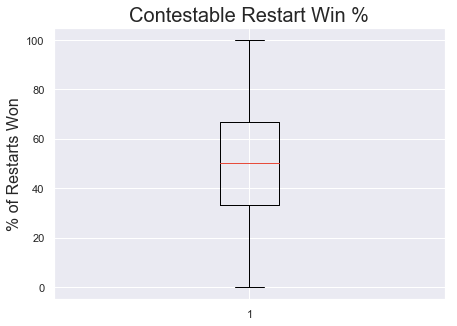

In [60]:
# 'Contestable_Restart_Win_Pct'
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Contestable Restart Win %', fontsize=20)
ax3.set_ylabel('% of Restarts Won',fontsize=16)
ax3.boxplot(usa['Contestable_Restart_Win_Pct'], flierprops=green_diamond)
plt.show()

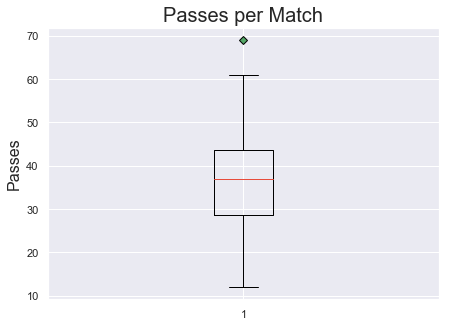

In [61]:
# 'Passes'
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Passes per Match', fontsize=20)
ax3.set_ylabel('Passes',fontsize=16)
ax3.boxplot(usa['Passes'], flierprops=green_diamond)
plt.show()

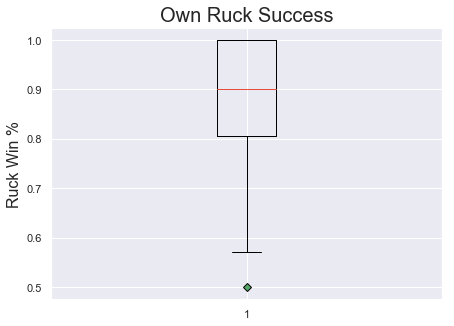

In [62]:
#ax = sns.boxplot(y='Possession Time', fliersize=.60, data=usa)
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Own Ruck Success', fontsize=20)
ax3.set_ylabel('Ruck Win %',fontsize=16)
ax3.boxplot(usa['% Ruck Success Own'], flierprops=green_diamond)
plt.show()

## Own Ruck Success and Passes Outliers/Anomalies
Looking at the boxplots for the important features, we see that the '% Ruck Success Own' feature, the USA's 50% win percentage, and the 69 passes in the 'Passes' feature were both outside 1.5 of the Interquartile Range.

The instance of the Passes anomaly occurred in a match against New Zealand	in the 2018 Paris 7s, which resulted in a loss.

The anomaly of the 50% win of their own rucks ocurred in a match against Kenya in the 2018 London 7s, which resulted in a rare tie.

Below is further information on the matches in which the outliers were found.

In [65]:
# usa_w = df[(df['Team'] == 'USA') & (df['Result'] == 1)]
# find match where the USA had an outlier of 50% own rate in their own rucks 
print("Ruck Win % Outlier")
outlier_ruck = usa.loc[usa['% Ruck Success Own'] == .50]
outlier_ruck[['Team', 'Opposition', 'Date', 'Tournament', '% Ruck Success Own','Result']]

Ruck Win % Outlier


,Team,Opposition,Date,Tournament,% Ruck Success Own,Result
116,USA,Kenya,6/3/18,2018_London_7s,0.5,2


In [66]:
# find match where the USA had an outlier of 69 passes
print("Pass Outlier")
outlier_pass = usa.loc[usa['Passes'] == 69]
outlier_pass[['Team', 'Opposition', 'Date', 'Tournament', 'Passes','Result']]

Pass Outlier


,Team,Opposition,Date,Tournament,Passes,Result
104,USA,New Zealand,5/27/18,2018_Paris_7s,69,0


## Comparing the USA's Performance in Important Feature Statistics in Wins vs. Losses
Look at how the USA performed in 2017-18 in the match statistics identified in the Random Forest Model as important features - features that contribute to the prediction of a win or a loss.  Because the model's important features don't tell us whether the feature had a positive or nagative impact on the result, we will need to examine these features in the match data, in a bit more depth.

In [26]:
w_impt_feat = usa_w[['Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded', 
                '% Ruck Success Own']]
#print('Important Feature Means in USA Wins')
win_avg = w_impt_feat.agg(['mean'])
win_avg['Results'] = pd.Series(("Wins"), index=win_avg.index)
print("2017-18 Important Feature Means in Wins")
win_avg

2017-18 Important Feature Means in Wins


,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own,Results
mean,243.121212,36.757576,51.731602,2.575758,0.893474,Wins


In [27]:
# USA losses
l_impt_feat = usa_l[['Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded', 
                '% Ruck Success Own']]
#print('Important Feature Means in USA Losses')
loss_avg = l_impt_feat.agg(['mean'])
loss_avg['Results'] = pd.Series(("Losses"), index=loss_avg.index)
print("2017-18 Important Feature Means in Losses")
loss_avg

2017-18 Important Feature Means in Losses


,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own,Results
mean,214.681818,38.909091,32.575758,2.545455,0.869217,Losses


In [28]:
# all USA matches
impt_feat = usa[['Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded', 
                '% Ruck Success Own']]
#print('Important Feature Means in All USA Matches')
all_avg = impt_feat.agg(['mean'])
all_avg['Results'] = pd.Series(("All"), index=all_avg.index)
print("2017-18 Important Feature Means Overall")
all_avg

# why is % Ruck Success Own a float, while the other win/loss is integer?

2017-18 Important Feature Means Overall


,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own,Results
mean,229.084746,37.20339,44.188862,2.576271,0.878939,All


In [29]:
total = all_avg.append(win_avg)
total = total.append(loss_avg, ignore_index=True)

In [30]:
cols = total.columns.tolist()
cols = ['Results','Possession Time',
 'Passes',
 'Contestable_Restart_Win_Pct',
 'Penalty/FK Conceded',
 '% Ruck Success Own']
total = total[cols]
total

,Results,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own
0,All,229.084746,37.203390,44.188862,2.576271,0.878939
1,Wins,243.121212,36.757576,51.731602,2.575758,0.893474
2,Losses,214.681818,38.909091,32.575758,2.545455,0.869217


## Means of Important Features in Wins and Losses*

The largest differences in the results of the important features in wins and losses appears to be in **Possession Time** and **Contestable Restart Win Percentage**. 

The Contestable Restart Win Percentage in USA wins is not surprising, as winning their own restarts is a hallmark of the USA game, and often leads to higher time of possession. Kickoffs/restarts are how the game is restarted after a score, with the scoring team kicking.  So, if a team has possession, scores, kicks off and regains their own kick, they will typically have long periods of possession.  

However, this makes a lower Time of Possession in Wins counterintuitive!

Additionally, the higher rate of "% Ruck Success Own" in losses is confounding as well. One would expect a higher rate of "% Ruck Success Own" to correspond with wins, rather than losses.

\* *Did not compile the mean results for Ties*

# *Change label and title size*

## Visualizing Important Features in USA Wins and Losses

We will now visualize the differences in in Possession Time and Contestable Restart Win Percentage in wins and losses, to see if it provides any more insight.

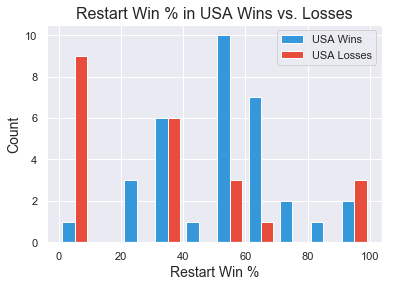

In [102]:
# Create a histogram of Contestable_Restart_Win_Pct
matplotlib.cm.get_cmap(name='seismic')
wins = usa_w['Contestable_Restart_Win_Pct']
losses = usa_l['Contestable_Restart_Win_Pct']
legend = ['USA Wins', 'USA Losses']
plt.hist([wins, losses], bins=10)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Restart Win %',fontsize=14)
plt.legend(legend)
plt.title('Restart Win % in USA Wins vs. Losses',fontsize=16)
plt.show()

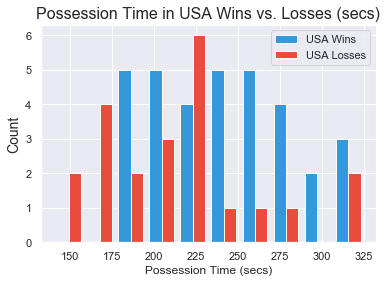

In [107]:
#Possession Time
matplotlib.cm.get_cmap(name='seismic')
poss_wins = usa_w['Possession Time']
poss_losses = usa_l['Possession Time']
legend = ['USA Wins', 'USA Losses']
plt.hist([poss_wins, poss_losses], bins=10)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Possession Time (secs)')
plt.legend(legend)
plt.title('Possession Time in USA Wins vs. Losses (secs)',fontsize=16)
plt.show()

We can see further evidence that, roughly, as the USA wins greater than 40% of their own restarts, they tend to win their matches. The mean Win Percentage for their Own REstarts was 44.2%.

Additionally, when the USA has possession for more than 3 minutes (180 seconds), they also have greater success, although there is a strange occurrence of losses at 3 min 45 seconds (225 seconds). The mean Possession time for all USA matches was 229 seconds.

## Plotting relationships between Important Features

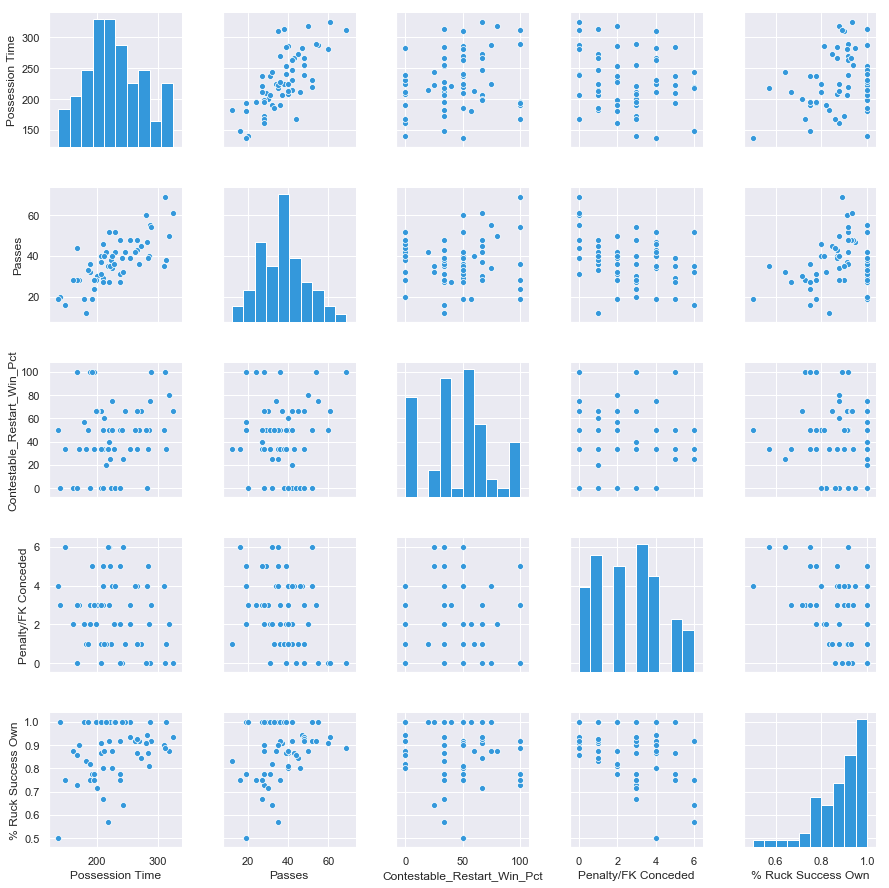

In [33]:
sns.pairplot(impt_feat,  palette='Set1') #hue='Result',
plt.show()

## Important Feature Correlation
Looking at the shape of the scatterplots, it looks like only Possession Time and Passes are correlated.  Let's look at the strength of this correlation.

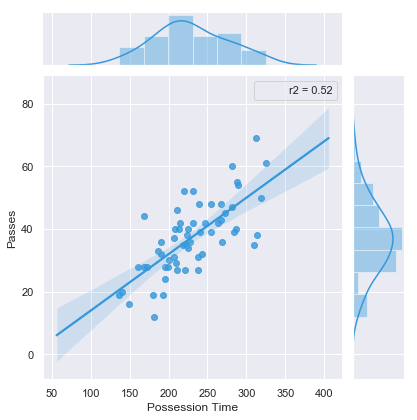

In [34]:
#Plot relationship between Poss Time Diff and Passes
# add Pearson's R value
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
#sns.jointplot(x, y, kind="reg", stat_func=r2)

sns.jointplot(x='Possession Time', y='Passes', data=impt_feat, kind="reg", stat_func=r2);

The correlation between Possession Time and Passes has a Pearson's R of 0.52, which makes intuitive sense - the longer a team has the ball, the more passes they are likely to make.

## Important Feature Performance in 2018-19 Series
We will now see how the USA performed in the important features in the first two tournaments of the 2018-19 World Series tournaments. How did the USA perform in the 'important features' in Dubai and Cape Town, the first two tournaments of 2018-19?

***Data for the second of the two tournaments (Cape Town) has not yet been released.***

In [35]:
df2 = pd.read_csv('../../Capstone1/Stats/2018-19_WR_Summaries/output/2018-19_Excel_FinalDF_matches.csv')
#/Users/admin/Dropbox/Springboard_DataScience/Capstone1/Stats/2018-19_WR_Summaries/output

In [36]:
#df2

In [37]:
# Conduct some data wrangling - strip extra characters out of Tournament names, and create a column for Wins and Losses
# Strip underscores from tournament name for better looking labels
df2['Tournament'] = df2['Tournament'].str.replace("_"," ")

In [38]:
#Create a Result column for Win/Loss.

#Temp DF to hold 'Result'
sub = pd.DataFrame(columns=['Result'])

#Iterate through rows and create 'Result' for Win/Loss (Win=1, Win=0)
for index, row in df2.iterrows():
    if index%2 == 0:
        new_row = df2.iloc[index+1]
        if row['MatchID'] == new_row['MatchID']:
            if row['Scores'] > new_row['Scores']:
                result1 = row['Result'] = 1
                result2 = new_row['Result'] = 0
            elif row['Scores'] < new_row['Scores']:
                result1 = row['Result'] = 0
                result2 = new_row['Result'] = 1
            else:
                result1 = row['Result'] = 2
                result2 = new_row['Result'] = 2

            sub.loc[index] = (result1)
            sub.loc[index+1]  = (result2)

df2 = pd.concat([df2, sub], axis=1)
#df2

In [39]:
#df of only USA matches
usa_19 = df2[(df2['Team'] == 'USA')]

# create a dataframe containing only the important features
impt_feat2 = usa_19[['MatchID','Opposition','Tournament', 'Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded', 
                '% Ruck Success Own', 'Result']]
impt_feat2

,MatchID,Opposition,Tournament,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own,Result
0,1,Australia,2019 Dubai 7s,215,43,25,4,83,1
2,2,Fiji,2019 Dubai 7s,315,63,75,1,100,1
4,3,New Zealand,2019 Dubai 7s,230,55,50,4,89,0
6,4,New Zealand,2019 Dubai 7s,202,45,0,3,88,0
8,5,Spain,2019 Dubai 7s,199,30,25,2,100,1
10,6,Wales,2019 Dubai 7s,55,5,0,2,0,1


In [40]:
#Subset USA Wins
usa19_w = impt_feat2[(impt_feat2['Result'] == 1)]
#Subset USA Losses
usa19_l = impt_feat2[(impt_feat2['Result'] == 0)]

## Examining Means of Dubai Important Features
Let's look at the means of important features in wins, losses, and overall.

In [41]:
#w_impt_feat = usa19_w[['Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded', 
#                '% Ruck Success Own']]
#print('Important Feature Means in USA Wins')
win_avg_19 = usa19_w.agg(['mean'])
win_avg_19['Results'] = pd.Series(("Wins"), index=win_avg_19.index)
win_avg_19

,MatchID,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own,Result,Results
mean,3.5,196.0,35.25,31.25,2.25,70.75,1.0,Wins


In [42]:
# USA losses
#l_impt_feat = usa_l[['Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded', 
#                '% Ruck Success Own']]
#print('Important Feature Means in USA Losses')
loss_avg_19 = usa19_l.agg(['mean'])
loss_avg_19['Results'] = pd.Series(("Losses"), index=loss_avg_19.index)
loss_avg_19

,MatchID,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own,Result,Results
mean,3.5,216.0,50.0,25.0,3.5,88.5,0.0,Losses


In [43]:
# all USA matches
#all_avg = impt_feat2[['Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded', 
#                '% Ruck Success Own']]
#print('Important Feature Means in All USA Matches')
all_avg_19 = impt_feat2.agg(['mean'])
all_avg_19['Results'] = pd.Series(("All"), index=all_avg_19.index)
all_avg_19

,MatchID,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own,Result,Results
mean,3.5,202.666667,40.166667,29.166667,2.666667,76.666667,0.666667,All


In [44]:
total_19 = all_avg_19.append(win_avg)
total_19 = total_19.append(loss_avg_19, ignore_index=True)

In [45]:
# reorder columns, move 'Results' to first column
cols = total_19.columns.tolist()
cols = ['Results','Possession Time',
 'Passes',
 'Contestable_Restart_Win_Pct',
 'Penalty/FK Conceded',
 '% Ruck Success Own']
total_19 = total_19[cols]
all_avg_19['Results'] = pd.Series(("All"), index=all_avg_19.index)

# Comparison: 2017-18 Season vs. Dubai 2018-19
Interestingly, the USA's Dubai performance in the important features was counterintuitive.  The performed below the 2017-18 mean in every metric, except for "Passes," yet still made it to the Cup Final.  One highlight was the match against Fiji, the reigning Olympic Gold Medalists, in the Cup Quarterfinal where they held the ball for 5:15, made 63 passes, won 75% of their own restarts, won 100% of their own rucks, and conceded only one penalty/free kick.

In [46]:
print("Dubai, 2018-19 Descriptive Statistics")
impt_feat2.describe()

Dubai, 2018-19 Descriptive Statistics


,MatchID,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3.500000,202.666667,40.166667,29.166667,2.666667,76.666667
std,1.870829,84.068226,20.556426,29.226130,1.211060,38.176782
min,1.000000,55.000000,5.000000,0.000000,1.000000,0.000000
25%,2.250000,199.750000,33.250000,6.250000,2.000000,84.250000
50%,3.500000,208.500000,44.000000,25.000000,2.500000,88.500000
75%,4.750000,226.250000,52.500000,43.750000,3.750000,97.250000
max,6.000000,315.000000,63.000000,75.000000,4.000000,100.000000


In [47]:
print("USA - Dubai, 2018-19, Important Features")
impt_feat2

USA - Dubai, 2018-19, Important Features


,MatchID,Opposition,Tournament,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own,Result
0,1,Australia,2019 Dubai 7s,215,43,25,4,83,1
2,2,Fiji,2019 Dubai 7s,315,63,75,1,100,1
4,3,New Zealand,2019 Dubai 7s,230,55,50,4,89,0
6,4,New Zealand,2019 Dubai 7s,202,45,0,3,88,0
8,5,Spain,2019 Dubai 7s,199,30,25,2,100,1
10,6,Wales,2019 Dubai 7s,55,5,0,2,0,1


In [48]:
total_18 = total[0:1]
tot_19 = total_19[0:1]
compar = total_18.append(tot_19)
compar['Season'] = pd.Series(("2018", "2019"), index=compar.index)
cols = ['Season','Results','Possession Time','Passes','Contestable_Restart_Win_Pct','Penalty/FK Conceded','% Ruck Success Own']
compar = compar[cols]
print("Comaparison of Important Feature Means, 2017-18 vs Dubai 2018-19")
compar

Comaparison of Important Feature Means, 2017-18 vs Dubai 2018-19


,Season,Results,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own
0,2018,All,229.084746,37.203390,44.188862,2.576271,0.878939
0,2019,All,202.666667,40.166667,29.166667,2.666667,76.666667


In Dubai, the USA performed well overall, losing only two matches - both to New Zealand.  The first loss was in a pool match and the second loss was in the Cup Final, losing 21-5.

### Pool Match, 24-7 Loss to NZ
In the pool match, New Zealand outperformed the USA in nearly ever area, except for "% Ruck Success Own" and "Penalty/FK Conceded".

In [49]:
df2[6:8]

,Team,Opposition,MatchID,TotalPoints,Tournament,Conversions,Contestable_Restart_Win_Pct,Lineout_Win_Pct,Scrum_Win_Pct,Scores,Tries,Possession Time,Passes,Rucks Attack,% Ruck Success Own,T-Overs Won,Penalty/FK Conceded,Ruck_Maul,Yellow_Red Cards,Result
6,USA,New Zealand,4,31,2019 Dubai 7s,1.0,0,1.0,0,7,1,202,45,8,88,3,3,1,1,0
7,NEW ZEALAND,USA,4,31,2019 Dubai 7s,0.5,0,1.0,1,24,4,276,54,19,84,5,6,4,1,1


### Cup Final, 21-5 Loss to NZ
Looking at the results from the Cup Final provides some insight into the sometimes maddening nature of Rugby 7s.  The USA outperformed New Zealand in nearly every statistical category.  However, one stat stands out where New Zealand outperformed the USA - in Turnovers Won.  New Zealand turned the USA's possession over six times the USA's three.

In [50]:
df2[4:6]

,Team,Opposition,MatchID,TotalPoints,Tournament,Conversions,Contestable_Restart_Win_Pct,Lineout_Win_Pct,Scrum_Win_Pct,Scores,Tries,Possession Time,Passes,Rucks Attack,% Ruck Success Own,T-Overs Won,Penalty/FK Conceded,Ruck_Maul,Yellow_Red Cards,Result
4,USA,New Zealand,3,26,2019 Dubai 7s,0.0,50,1.0,1,5,1,230,55,9,89,3,4,2,0,0
5,NEW ZEALAND,USA,3,26,2019 Dubai 7s,1.0,0,0.5,1,21,3,212,31,8,75,6,4,2,1,1


In [51]:
df2

,Team,Opposition,MatchID,TotalPoints,Tournament,Conversions,Contestable_Restart_Win_Pct,Lineout_Win_Pct,Scrum_Win_Pct,Scores,Tries,Possession Time,Passes,Rucks Attack,% Ruck Success Own,T-Overs Won,Penalty/FK Conceded,Ruck_Maul,Yellow_Red Cards,Result
0,USA,Australia,1,39,2019 Dubai 7s,0.250000,25,0.0,1,22,4,215,43,6,83,5,4,1,1,1
1,AUSTRALIA,USA,1,39,2019 Dubai 7s,0.333333,50,0.0,1,17,3,308,51,17,94,3,1,1,0,0
2,USA,Fiji,2,38,2019 Dubai 7s,0.500000,75,1.0,1,24,4,315,63,9,100,3,1,1,0,1
3,FIJI,USA,2,38,2019 Dubai 7s,1.000000,0,1.0,1,14,2,132,25,1,100,2,4,1,1,0
4,USA,New Zealand,3,26,2019 Dubai 7s,0.000000,50,1.0,1,5,1,230,55,9,89,3,4,2,0,0
5,NEW ZEALAND,USA,3,26,2019 Dubai 7s,1.000000,0,0.5,1,21,3,212,31,8,75,6,4,2,1,1
6,USA,New Zealand,4,31,2019 Dubai 7s,1.000000,0,1.0,0,7,1,202,45,8,88,3,3,1,1,0
7,NEW ZEALAND,USA,4,31,2019 Dubai 7s,0.500000,0,1.0,1,24,4,276,54,19,84,5,6,4,1,1
8,USA,Spain,5,29,2019 Dubai 7s,0.400000,25,1.0,1,29,5,199,30,7,100,5,2,0,0,1
9,SPAIN,USA,5,29,2019 Dubai 7s,0.000000,0,1.0,1,0,0,134,31,7,57,3,5,4,0,0


## Conclusion
In the course of this analysis, it has become clear that, while feature importance is a crucial tool in model evaluation, in this analysis it is not neccessarily a reliable predictor of a match's outcome - not in individual matches, nor in macro-level metrics for the entire season.  

The 'Contestable_Restart_Win_Pct' feature does appear to be a strong indicator when looking at macro-level performance across a Series, but it appears that the game of Rugby 7s is too volatile to be able to develop strong and accurate predictors at the match level. 

This volatility is best illustrated as by the USA's recent loss to New Zealand in Dubai, where they outperformed New Zealand in nearly every metric, but were still beaten  soundly.